# CSCI 3360 HW 4: Simple Sentiment Analysis
In this assignment, we are going to do a sentiment analysis on the Amazon review dataset using a Naive Bayes model. The task of sentiment analysis involves lots of concepts and techniques from **natural language processing (NLP)**, but here we will use the simplest model and take very _naive_ approach.

For this task, you will need to
- prepare and clean text data,
- preprocess the data to remove information irrelevant to our task,
- extract feature vectors from review texts (using <font color="red">bag-of-words </font>model), and
- train a naive bayes model to classify positive and negative reviews

## Submission instruction
- Due by **<font color="red">11:59pm on April. 12, 2018</font>**
- Complete this notebook and submit it by the due date
- Do not use any 3rd party libraries unless you are asked to do so.
- Feel free to define your own functions if needed.
- Do not hard-code any data-specific operations.

We will use Natural Language ToolKit (**NLTK**) python package for tokenizing text, removing *stop words*, and stemming words. The official website of NLTK, [https://www.nltk.org/data.html](https://www.nltk.org/data.html), contains lots of useful information and code examples. If you want to know more about text mining and natural language processing, [here](http://www.nltk.org/book_1ed/)'s an online book about *natural language processing* in python.

You can install *NLTK* using either `pip` or `conda`.
```
pip install nltk
```
or
```
conda install nltk
```

As always, let's start by importing the libraries required for our task.

In [1]:
%matplotlib inline

import numpy as np
import nltk
import pandas as pd
import matplotlib.pyplot as plt

## Part 1. Preparing the Dataset

For this assignment, we're going to use the amazon instant video review data, which can be downloaded from [here](http://cs.uga.edu/~jwlee/datasets/Amazon_Instant_Video_5.json). Your first task is to load the dataset (in .json format) into a pandas dataframe, and print out all the attributes. Note that the input dataset contains **a json object per line**.

### Q1. Load the JSON objects in the dataset into a dataframe and display all the attributes (5 pts).

In [2]:
# load the dataset into a dataframe
dataset = pd.read_json("../Desktop/python/dataset/Amazon_Review.json",lines=True)
df =  pd.DataFrame(dataset)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37126 entries, 0 to 37125
Data columns (total 9 columns):
asin              37126 non-null object
helpful           37126 non-null object
overall           37126 non-null int64
reviewText        37126 non-null object
reviewTime        37126 non-null object
reviewerID        37126 non-null object
reviewerName      36797 non-null object
summary           37126 non-null object
unixReviewTime    37126 non-null int64
dtypes: int64(2), object(7)
memory usage: 2.8+ MB


If you have successfuly loaded the dataset, as you can see above there are 37,126 reviews. Also, we notice that some of reviwers' name are missing. Among those attributes, we will only use two of them: **overall** and **reviewText**.

Let's look at the first 5 rows (I assumed that you named your dataframe as `df`).

In [3]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B000H00VBQ,"[0, 0]",2,I had big expectations because I love English ...,"05 3, 2014",A11N155CW1UV02,AdrianaM,A little bit boring for me,1399075200
1,B000H00VBQ,"[0, 0]",5,I highly recommend this series. It is a must f...,"09 3, 2012",A3BC8O2KCL29V2,Carol T,Excellent Grown Up TV,1346630400
2,B000H00VBQ,"[0, 1]",1,This one is a real snoozer. Don't believe anyt...,"10 16, 2013",A60D5HQFOTSOM,"Daniel Cooper ""dancoopermedia""",Way too boring for me,1381881600
3,B000H00VBQ,"[0, 0]",4,Mysteries are interesting. The tension betwee...,"10 30, 2013",A1RJPIGRSNX4PW,"J. Kaplan ""JJ""",Robson Green is mesmerizing,1383091200
4,B000H00VBQ,"[1, 1]",5,"This show always is excellent, as far as briti...","02 11, 2009",A16XRPF40679KG,Michael Dobey,Robson green and great writing,1234310400


## Part 2: EDA

Let's try to get more insight about the dataset we are dealing with. A natural question we may ask is "is the overall rating related with the length of a review?".

### Q2. Draw a pie chart showing the distribution of overall ratings (10 pts).

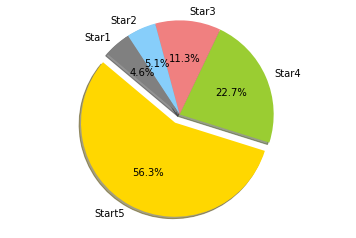

In [4]:
#########################
#  Your code goes here  #
#########################
overall = df['overall'].value_counts()
# now, we need to create a pie chart
overall1 = np.array(overall)
labels = 'Start5', 'Star4', 'Star3', 'Star2','Star1'
sizes = overall1
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', "grey"]
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice\n",
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()



### Q3. Draw histograms of review text lengths by class label (15 pts).
+ add a column to show the length of each review
+ add a column of labels 
    - if overall $\geq$ 4, label='F' (Favorable)
    - If overalll < 4, label='U' (Unfavorable)
+ apply **[top-coding](https://en.wikipedia.org/wiki/Top-coded)** to review length column
    - if legnth $\geq$ 3000, clip the value to 3000 (i.e., upper-bound it)
    - if length < 3000, use the value as it is.

In [5]:

#########################
#  Your code goes here  #
#########################
# First Part:
review_length = []
for i in range(len(df['reviewText'])):
    review_length.append(len(df['reviewText'][i].encode()))    
df['reviewText_length'] = review_length
Fav_unFav = []
for a in range(len(df['overall'])):
    if df['overall'][a] >= 4:
        Fav_unFav.append('F')
    elif df['overall'][a] < 4:
        Fav_unFav.append('U')
df['Fav_unFav'] = Fav_unFav
   
# Third Part:  
for x in range(len(df['reviewText'])):
    if df.loc[x,'reviewText_length'] >= 3000:
        df.loc[x,'reviewText_length'] = 3000


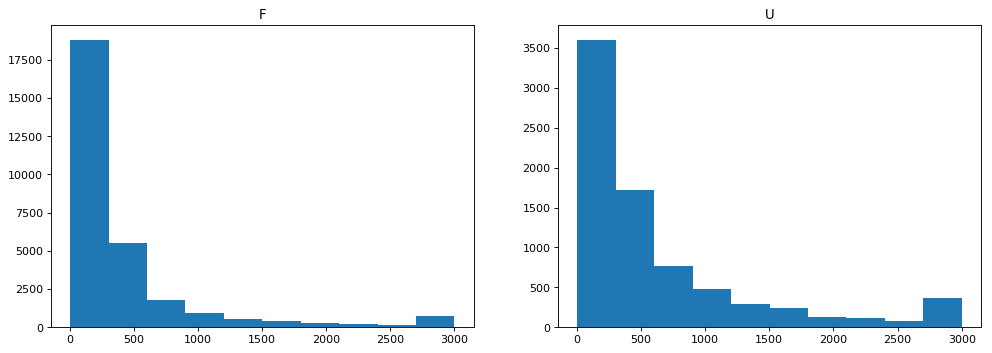

In [6]:
# Here is the data preparation
dic = {
       'length':df['reviewText_length'],
       'F_U':df['Fav_unFav']
    }
dic1 = pd.DataFrame(dic)
    # In this step, we need to subsetting data
dic_U = []
dic_U_length = []
dic_F = []
dic_F_length = []
    
for a in range(len(dic1)):
    if dic1["F_U"][a] == 'U':
        dic_U.append(dic1["F_U"][a])
        dic_U_length.append(dic1["length"][a])
    elif dic1["F_U"][a] == 'F':
        dic_F.append(dic1["F_U"][a])
        dic_F_length.append(dic1["length"][a])
            
dic_U = pd.DataFrame(dic_U)
dic_U['length'] = dic_U_length
dic_U.columns = ['F_U','length']
    
dic_F = pd.DataFrame(dic_F)
dic_F['length'] = dic_F_length
dic_F.columns = ['F_U','length']
    
    # Creating the histogram\n",
plt.figure(num=None, figsize=(15, 5), dpi=80)
    
plt.subplot(1, 2, 1)
plt.hist(dic_F["length"])
plt.title("F")
    
plt.subplot(1, 2, 2)
plt.hist(dic_U["length"])
plt.title("U")
plt.show()

As you can see from the above figure, both favorable and unfavorable reviews have similar distributions in terms of the length.

The *helpful* attribute represents the fraction of users who found the review helpful, e.g., 2/3. Let's see how the distribution of this helpfulness variable changes by the class label (F or U).

### Q4. Draw a boxplot showing the distribution of helpfulness by class label (10 pts).

In [7]:
df1 = df[['helpful','Fav_unFav']] # Those are the information we need to build the chart

In [8]:
df1.is_copy = False   #This will take a long time to process 
c1 = 0
c2 = 1
for a in range(len(df1['helpful'])):
    if df1['helpful'][a] == [0, 0]:
        df1.loc[a,'helpful'] = 0.0 
    else:
        result = df1['helpful'][a][c1]/float(df1['helpful'][a][c2])
        df1.loc[a,'helpful'] = result

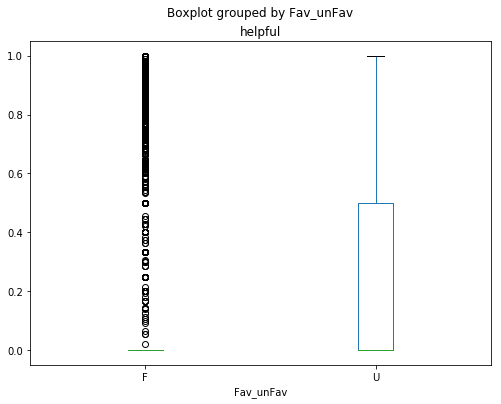

In [9]:
df1.boxplot(column ="helpful", by='Fav_unFav',grid=False, figsize= (8,6))
#Done 

- Draw the boxplot (5 pts).
- Provide your interpretation on the above plot (5 pts).

## Part 3. Feature Extraction (Bag-of-Words)

Before extracting features, for simplicity, let's drop the columns we will not be using.

In [10]:
# remove all the columns except reviewText and overall
df.drop('asin', axis=1, inplace=True)
df.drop('helpful', axis=1, inplace=True)
df.drop('reviewTime', axis=1, inplace=True)
df.drop('reviewerID', axis=1, inplace=True)
df.drop('reviewerName', axis=1, inplace=True)
df.drop('summary', axis=1, inplace=True)
df.drop('unixReviewTime', axis=1, inplace=True)

For supervised learning, we need class labels $Y$.
To get started, let's generate the label $Y_i$ for the $i^{\mathrm{th}}$ review as follows:
$$
Y_i = \begin{cases}
0 & \mbox{if overall < 4} \\
1 & \mbox{if overall $\geq$ 4}
\end{cases}
$$

In [11]:
# creating a label for each review in the dataset
df.loc[df['overall'] >= 4, 'label'] = 1
df.loc[df['overall'] < 4, 'label'] = 0
df.head()

,overall,reviewText,reviewText_length,Fav_unFav,label
0,2,I had big expectations because I love English ...,159,U,0.0
1,5,I highly recommend this series. It is a must f...,186,F,1.0
2,1,This one is a real snoozer. Don't believe anyt...,134,U,0.0
3,4,Mysteries are interesting. The tension betwee...,141,F,1.0
4,5,"This show always is excellent, as far as briti...",1300,F,1.0


Recall that in the bag-of-words representation each document (review) $d_i$ is expressed as a feature vector of length $|V|$, where $V$ is the vocabulary. That is, the $i^{\text{th}}$ document $d_i$ is represented by
$$ d_i = (f_{i1}, f_{i2}, \ldots, f_{i|V|}),$$
where $f_{i1}$ corresponds to the frequency of $i^{\text{th}}$ word in $d_i$.
We can __convert each review in your data to a feature vectors__ using scikit-learn's [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).   In `CountVectorizer`, you have an option to specify the vocabulary you would like to use for composing your feature vectors. If this is not specified, by default the `CountVectorizer` builds the vocabulary by including **all words** in the collection of documents. Let's try and see how many words there are.



In [12]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
count_vect.fit_transform(df['reviewText'])

vocab = count_vect.vocabulary_

print "The size of vocabulary V is {0}.".format(len(vocab))

The size of vocabulary V is 54045.


This means that we need a vector of length <font color="red">**54,045**</font> to just represent a document (or a review) if we use **all words** in the dataset as our vocabulary. This is too many features, and let's try to reduce the size by removing irrelevant words from the vocabulary.

### Removing the stop words

To remove the stop words, we will use the **natural language toolkit (NLTK)**. See [here](http://www.nltk.org) for details. There is a pre-defined list of stop words for english. You can load it using the following code. You may need to download the resource that contains the pre-defined stop words.

```python
import nltk

nltk.download()
```
This will pop up a new window in which you can choose which collection to install.

In [14]:
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

### Q5. Do the following pre-processings (30 pts).
- **Lowercase** the review texts (notice that all the stop words in NLTK's list is in lowercase)
- Using the set of stop words defined in NLTK, filter out all the **stop words** in our review data. 
- Also, remove all words whose length is smaller than 3. See [here](https://pythonprogramming.net/stop-words-nltk-tutorial/) for how to remove stop words using nltk.
- Apply the **Porter stemming** algorithm (See [here](https://pythonprogramming.net/stemming-nltk-tutorial/) for an example)

In [15]:
###############################################
#    Your code for pre-processing goes here   #
###############################################
"""I think I need to spend time on debuggin this part"""
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
df['reviewText'] = df['reviewText'].str.lower()
ps = PorterStemmer()
getit = []
# Part2: filter out stop word
for a in range(len(df['reviewText'])):
    word_tokens = word_tokenize(df['reviewText'][a])
    filtered_sentence = [w for w in word_tokens if not (w in stop_words) and (len(w) >= 3)] #
    further_filtered_sentence = []
# part3: stemming
    for w in filtered_sentence:
        further_filtered_sentence.append(ps.stem(w))
    result = " ".join(further_filtered_sentence)
    getit.append(result)

df['reviewText_filtered'] = getit


Now let's build the feature vectors again and see how many words we have.

In [20]:
count_vect = CountVectorizer()
count_vect.fit_transform(df['reviewText_filtered'])
vocab = count_vect.vocabulary

print "The size of vocabulary V (after the pre-processing) is {0}.".format(len(vocab))
# Question 5 is done.

TypeError: object of type 'NoneType' has no len()

The size of vocabulary has been reduced a lot, but this is still too large! To reduce the size significantly, we will focus on the words that occurs frequently in the documents. How can we find the top $k$ most frequent words in our reviews? You can use `nltk.FreqDist` class for this purpose. See [here](http://www.nltk.org/book/ch01.html) for examples.

### Q6. Write a function that returns a vocabulary consisting of frequent words (20 pts).

In [22]:
from nltk import FreqDist
from nltk.tokenize import word_tokenize
def build_vocabulary(topk=3000):
    """
    build a vocabulary using the top k most frequent words
    
    Parameters:
    -------------
    topk: int, the number of top k frequent words to include into the vocabulary
    
    Returns:
    ---------
    vocab: a dictionary (key=word, value=index)
    """
    #########################
    #  Your code goes here  #
    #########################  
    # This is working!! But it will take me about 1 hour to finish it -- too long!!!
    fdist = FreqDist()
    word_tokens_list = []
    for a in range(len(df['reviewText_filtered'])):
        word_tokens_list.extend(word_tokenize(df['reviewText_filtered'][a])) # the extend could combine [1,2] and [2,3] together to create a list of [1,2,2,3]
    fdist1 = FreqDist(word_tokens_list)
    vocab = fdist1.most_common(topk)
    vocab = list(vocab)
    vocab = [list(elem) for elem in vocab]
    for a in range(3000):
        vocab[a][1] = a
    # After I change the value, I still need to change it back to tuple 
    vocab = [tuple(elem) for elem in vocab]
    vocab = tuple(vocab)
    
    return vocab

vocab = build_vocabulary()

The above table shows the top 20 most frquent words in our review dataset. Now we are ready to build feature vectors using the vocabulary consisting of 3,000 frequent words.

In [35]:
count_vect = CountVectorizer(vocabulary=vocab) # This part is right
X = count_vect.fit_transform(df['reviewText_filtered'])# Learn the vocabulary dictionary and return term-document matrix
y = df.as_matrix(['label']).ravel()

print "X.shape=", X.shape
print "y.shape=", y.shape
# Got some issue in this section.


X.shape= (37126, 3000)
y.shape= (37126,)


## Part 4. Text classification
Now that we have feature vectors and labels, we can do text classification using the classifiers we learned in class. In this assignment, we will consider two classifiers, _naive bayes_ and _logistic regression_, and compare their performance. First, let's split the dataset into training and testing sets. Use the first 30,000 examples for training and 7,126 examples for testing.

In [37]:
from sklearn.model_selection import train_test_split
# number of examples to use for training
n_train = 30000
X_train, y_train = X[:n_train, :], y[:n_train] # we got train dataset and test dataset 
X_test, y_test = X[n_train:, :], y[n_train:]

###  Q7. Build the naive bayes and logistic regression classifiers on the training set (10 pts).
- Print out both training and test accuracies.

In [40]:
from sklearn.naive_bayes import MultinomialNB
"""
 1.The following are Naive Baye regression 
"""
naive = MultinomialNB()
naive.fit(X_train, y_train)
# training is done 

y_pred = naive.predict(X_train)

y_pred_train 

[ 1.  1.  1. ...,  1.  1.  1.]


In [445]:
print y_pred

[ 1.  1.  1. ...,  1.  1.  1.]


In [456]:

y_pred = naive.predict(X_test)

# possibly wrong 
a = 0
for i in range(len(y_pred)):
    if y_pred[i] == 1:
        a = a +1
# Total amount of 1 in y_test 
b = 0 
for i in range(len(y_test)):
    if y_test[i] == 1:
        b = b +1 
        

print "The naive baye, train accuracy = {}".format(b/float(a))

The naive baye, train accuracy = 0.72523154645


In [442]:
from sklearn.linear_model import LogisticRegression
#########################
#  Your code goes here  #
#########################
"""
    2.The following are logistic regression 
"""
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
# Predicting the test set results
y_pred = classifier.predict(X_test)

# Total amount of 1 in y_pred
a = 0
for i in range(len(y_pred)):
    if y_pred[i] == 1:
        a = a +1
# Total amount of 1 in y_test
b = 0 
for i in range(len(y_test)):
    if y_test[i] == 1:
        b = b +1     
print "The logistic regression, test accuracy = {}".format(b/float(a))
 
classifier.fit(X_test, y_test)
# Predicting the test set results
y_pred = classifier.predict(X_train) 
# Total amount of 1 in y_pred
a = 0
for i in range(len(y_pred)):
    if y_pred[i] == 1:
        a = a +1
# Total amount of 1 in y_train
b = 0 
for i in range(len(y_train)):
    
    if y_train[i] == 1:
        b = b +1
        
print "The logistic regression, train accuracy = {}".format(b/float(a))

The logistic regression, test accuracy = 0.72523154645
The logistic regression, train accuracy = 0.8056


## TF-IDF Transform
So far, we've been using the frequency of words in review data as our features, which may **overly emphasize** the importance of the words that appear frequently in both positive and negative reviews. For example, the word "_show_" is **not very informative** as it occurs frequently across all reviews. In <font color="red">**TF-IDF**</font> model, a document's frequency is _reweighted_ by multiplying the inverse of its frequency across all documents. For more details, read [this article](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).

**Sklearn** provides an easy way to convert your feature vector of term freqeuncy into tf-idf vectors. [TfidfTransoformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html) transforms a count matrix to a normalized tf or tf-idf representation. 

### Q8. Apply the TF-IDF transform to your dataset and reperform the classification task you did in Q7 (15 pts).
- Does this transform improve the _accuracy_ of your classifier?

In [426]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#########################
#  Your code goes here  #
#########################
"""
     Using TF-IDF to solve the question!!
     The following is the naive bayes part
"""
# Referenece file="http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html"
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)# This part will do the transformation
clf = LogisticRegression(random_state=0).fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test)

# Total amount of 1 in y_pred
a = 0
for i in range(len(y_pred)):
    if y_pred[i] == 1:
        a = a +1
# Total amount of 1 in y_test
b = 0 
for i in range(len(y_test)):
    if y_test[i] == 1:
        b = b +1     
print "The naive bayes, test accuracy = {}".format(b/float(a))

X_test_tfidf = tfidf_transformer.fit_transform(X_test)# This part will do the transformation
clf = LogisticRegression(random_state=0).fit(X_test_tfidf, y_test)
y_pred = clf.predict(X_train)
# Predicting the test set results
y_pred = classifier.predict(X_train) 
# Total amount of 1 in y_pred
a = 0
for i in range(len(y_pred)):
    if y_pred[i] == 1:
        a = a +1
# Total amount of 1 in y_train
b = 0 
for i in range(len(y_train)):
    if y_train[i] == 1:
        b = b +1
        
print "The naive bayes, train accuracy = {}".format(b/float(a))

The naive bayes, test accuracy = 0.72523154645
The naive bayes, train accuracy = 0.8056


In [427]:
"""
    The following is the logistic regression part 
"""

X_train_tfidf = tfidf_transformer.fit_transform(X_train)# This part will do the transformation
clf = MultinomialNB().fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test)

# Total amount of 1 in y_pred
a = 0
for i in range(len(y_pred)):
    if y_pred[i] == 1:
        a = a +1
# Total amount of 1 in y_test
b = 0 
for i in range(len(y_test)):
    if y_test[i] == 1:
        b = b +1     
print "The logistic regression, test accuracy = {}".format(b/float(a))

X_test_tfidf = tfidf_transformer.fit_transform(X_test)# This part will do the transformation
clf = MultinomialNB().fit(X_test_tfidf, y_test)
y_pred = clf.predict(X_train)
# Predicting the test set results
y_pred = classifier.predict(X_train) 
# Total amount of 1 in y_pred
a = 0
for i in range(len(y_pred)):
    if y_pred[i] == 1:
        a = a +1
# Total amount of 1 in y_train
b = 0 
for i in range(len(y_train)):
    if y_train[i] == 1:
        b = b +1
        
print "The logistic regression, train accuracy = {}".format(b/float(a))


The logistic regression, test accuracy = 0.72523154645
The logistic regression, train accuracy = 0.8056


Now, let's do a simple test. The followings are the reviews on the movie, black panther, that had been copied from IMDB. Can the classifiers built using the Amazon instant video review dataset be used to predict the sentiment of IMDB reviews?

In [428]:
black_panther_review1 = "This movie should average a 7/10. Feels like Disney paid for 25,000 votes at 10/10. I had to rate it as only one star to help counter that 10/10 marketing flood nonsense. The movie is reasonable for discount theater days but for full price, I don\'t think so. It relies heavily on silly conflict based on ignoring truth. There\'s no reason to kill the king because his father killed your father if it was done out of defense. Also, what's a civilization with highly educated citizens, a higher sense of morality, and highly advanced technology doing with a duel to the death to be king thing still part of the culture? Shouldn't they have let go of that centuries ago? It feels to me like Marvel is starting to feel the profit suck of Disney. Make lots of okay movies and make lots of money for the parent company. Then again... that last Thor movie was quite good."
black_panther_review2 = "First off, Wakanda is a marvel. The people there are living in 2038 in terms of technology but ironically the world thinks it's a third world country. That sets the scene for the entire movie. The story is about how a young king seeks to right the wrongs of his father and his father before him. It's an intriguing story mixed with humor at just the right times. The music is fantastic and the costume is even more so. Great performances all around and Michael B. Jordan (Killmonger) totally nailed it. He was amazing. Drinking in the marvel that is Wakanda coupled with the amazing stunts makes the whole movie kinda short. On the whole this is a solid 10 /10 movie and congrats to the whole cast and crew."

bp_review = [black_panther_review1, black_panther_review2]

bp_X = count_vect.fit_transform(bp_review) 
for i, pred in enumerate(naive.predict(bp_X)):
     print "review {} is {} review.".format(i+1, "a favorable" if pred==1 else "an unfavorable")

review 1 is a favorable review.
review 2 is a favorable review.


Does the above prediction seem to be correct?
- Yes, the prediction is correct. 